In [5]:
import warnings
warnings.filterwarnings('ignore')
# the following line is jupyter notebook specific 
%matplotlib inline

import kkdata


def get_population_stat():
    neighbourhoods = kkdata.STATISTICS[2015].keys()
    age_range = set([])
    for n in neighbourhoods:
        age_range.update(kkdata.STATISTICS[2015][n].keys())

    no_citicens_per_age = {}

    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata.STATISTICS[2015][n].keys():
                c_codes = set(kkdata.STATISTICS[2015][n][age].keys())
                for f_code in c_codes:
                    no_citicens_per_age.setdefault(age, 0)
                    no_citicens_per_age[age] += kkdata.STATISTICS[2015][n][age][f_code]

    return no_citicens_per_age


ages = list(get_population_stat().keys())
no_citicens = list(get_population_stat().values())
#get_population_stat()

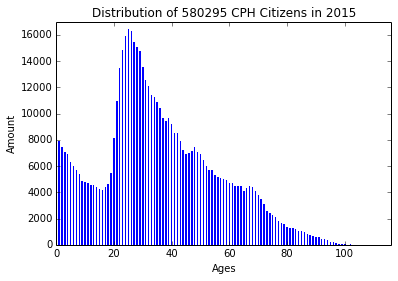

In [6]:
import matplotlib.pyplot as plt
  

plt.bar(ages, no_citicens, width=0.5, linewidth=0, align='center')
plt.ticklabel_format(useOffset=False)
plt.axis([0, max(ages) + 10, 0, 17000])
title = 'Distribution of {} CPH Citizens in {}'.format(sum(no_citicens), 2015)
plt.title(title, fontsize=12)
plt.xlabel("Ages", fontsize=10)
plt.ylabel("Amount", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)


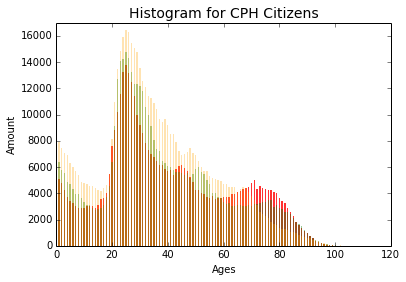

In [7]:
def get_population_stat_complete(year_of_interest=2015):
    neighbourhoods = kkdata.STATISTICS[year_of_interest].keys()
    age_range = set([])
    for n in neighbourhoods:
        age_range.update(kkdata.STATISTICS[year_of_interest][n].keys())

    no_citicens_per_age = {}

    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata.STATISTICS[year_of_interest][n].keys():
                c_codes = set(kkdata.STATISTICS[year_of_interest][n][age].keys())
                for f_code in c_codes:
                    no_citicens_per_age.setdefault(age, 0)
                    no_citicens_per_age[age] += kkdata.STATISTICS[year_of_interest][n][age][f_code]

    return (list(no_citicens_per_age.keys()), 
            list(no_citicens_per_age.values()))
    
    
def plot_histogram(ages, amounts, year, color='blue', alpha=1.0):
    x_values, y_values = ages, amounts
    plt.bar(x_values, y_values, width=0.5, linewidth=0, align='center', 
            color=color, alpha=alpha)
    plt.axis([0, 120, 0, 17000])
    title = 'Histogram for CPH Citizens'
    plt.title(title, fontsize=14)
    plt.xlabel("Ages", fontsize=10)
    plt.ylabel("Amount", fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    

year_of_interest = 1992
ages, amounts = get_population_stat_complete(year_of_interest)
plot_histogram(ages, amounts, year_of_interest, color='red', alpha=0.8)

year_of_interest = 1998
ages, amounts = get_population_stat_complete(year_of_interest)
plot_histogram(ages, amounts, year_of_interest, color='green', alpha=0.4)

year_of_interest = 2015
ages, amounts = get_population_stat_complete(year_of_interest)
plot_histogram(ages, amounts, year_of_interest, color='orange', alpha=0.3)

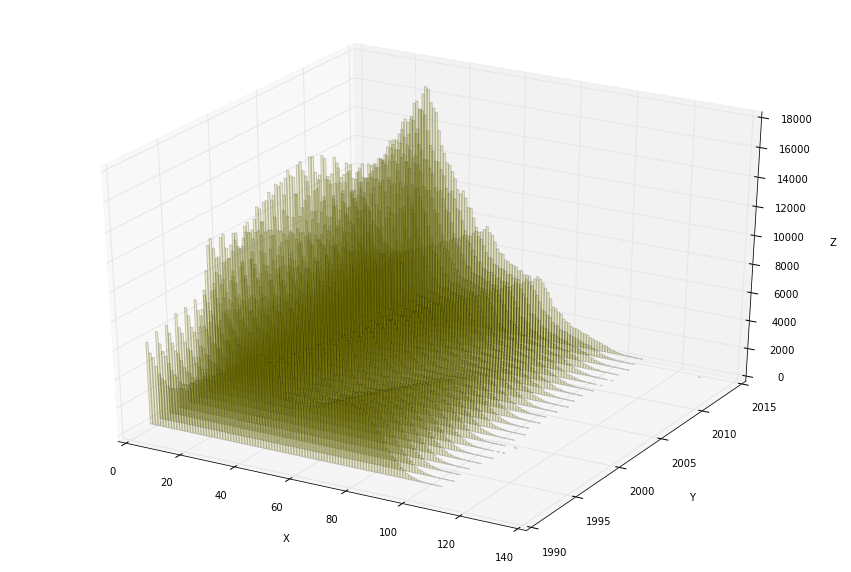

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
years = list(range(2015, 1991, -1))
for year_of_interest in years:
    ages, amounts = get_population_stat_complete(year_of_interest)
    xs, ys = ages, amounts
    ax.bar(xs, ys, zs=year_of_interest, zdir='y', alpha=0.2, color='y')
    
    #ax.scatter(xs, ys, zs=year_of_interest, zdir='y', alpha=0.2, cmap='hot', c=year_of_interest)
    #ax.plot_wireframe(xs, ys, year_of_interest, zdir='y', cstride=8, rstride=8, color = 'k')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#plt.savefig('3d_histo.png', bbox_inches='tight', dpi=300)
plt.show()

(0, 19000)

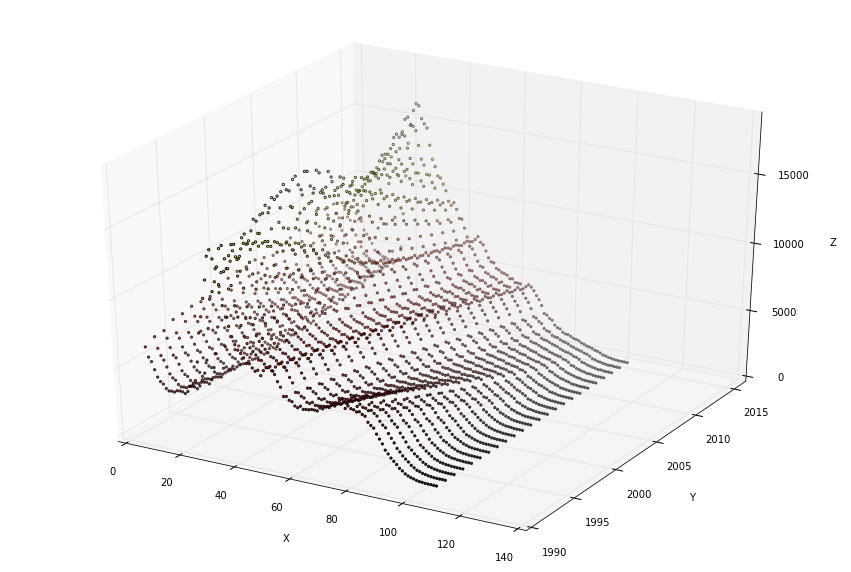

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


#ax.plot3D?
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
years = list(range(2015, 1991, -1))

xs, ys, zs = [], [], []

for year_of_interest in years:
    ages, amounts = get_population_stat_complete(year_of_interest)
    #print(len(ages), len(amounts))
    y = [year_of_interest] * len(ages[:105])
    xs.append(ages[:105])
    ys.append(y)
    zs.append(amounts[:105])
    
#ax.scatter3D([[10,20], [10,25]], [[10,10], [15,15]], zs=[[15,5],[15,5]])    
ax.scatter3D(xs, ys, zs=zs, s=5, c=zs, cmap=plt.get_cmap("hot"))    
#ax.plot_wireframe(xs, ys, zs, rstride=10, cstride=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim3d(0, 140)
ax.set_ylim3d(1990, 2016)
ax.set_zlim3d(0, 19000)
# ax.view_init(0, 0)
#plt.savefig('3d_histo2.png', bbox_inches='tight', dpi=300)